In [168]:
# Martin Leonardo Aritonang
# martinleonardoaritonang@gmail.com

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### 1. Cleansing Data

I used SQL to join the data in one table and here the result

In [116]:
df = pd.read_excel('Assessment.xlsx')

In [117]:
df.head()

,Date,channel_id,category_id,supplier_id,industry_id,pic_id,status,Revenue,Cost,commission,count
0,2020-01-01,1,1,1,4,4,0,98845,99048,2970,3
1,2020-01-01,1,2,1,4,4,1,879565,879563,26387,2
2,2020-01-01,1,3,2,4,4,1,322580,322227,0,1
3,2020-01-01,1,4,3,4,4,1,1945450,1830540,0,7592
4,2020-01-01,1,4,3,4,4,0,310835,296239,3110,200


In [118]:
#check if there any null values
df.isnull().sum()

Date           0
channel_id     0
category_id    0
supplier_id    0
industry_id    0
pic_id         0
status         0
Revenue        0
Cost           0
commission     0
count          0
dtype: int64

In [119]:
# check datatype for each column
df.dtypes

Date           datetime64[ns]
channel_id              int64
category_id             int64
supplier_id             int64
industry_id             int64
pic_id                  int64
status                  int64
Revenue                 int64
Cost                    int64
commission              int64
count                   int64
dtype: object

In [121]:
# Because channel_id, category_id, supplier_id, and status are string, we need to change it from int to str

df['channel_id'] = df['channel_id'].astype(object)
df['category_id'] = df['category_id'].astype(object)
df['supplier_id'] = df['supplier_id'].astype(object)
df['industry_id'] = df['industry_id'].astype(object)
df['pic_id'] = df['pic_id'].astype(object)
df['status'] = df['status'].astype(object)

In [122]:
#re-check the data types
df.dtypes

Date           datetime64[ns]
channel_id             object
category_id            object
supplier_id            object
industry_id            object
pic_id                 object
status                 object
Revenue                 int64
Cost                    int64
commission              int64
count                   int64
dtype: object

### 2. Data Analyst

#### 1. two channels that have the best sales performance

In [129]:
#search for the biggest total revenue for each channel_id
df.groupby('channel_id')['Revenue'].sum().sort_values(ascending=False).head(5)

channel_id
1     24781598085
9      6185959390
14     4823541765
13     4036365380
3      3701017160
Name: Revenue, dtype: int64

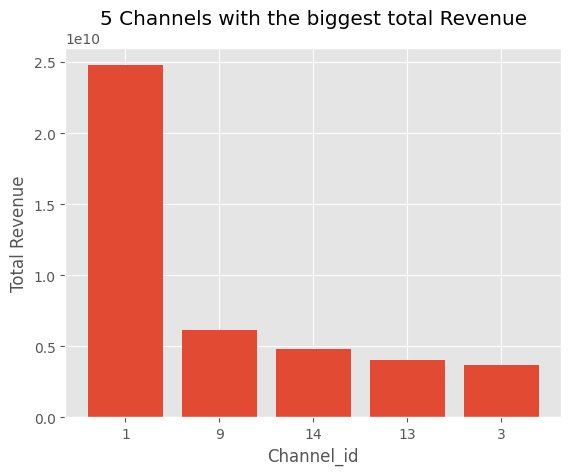

In [128]:
#visualization

index1 = df.groupby('channel_id')['Revenue'].sum().sort_values(ascending=False).head(5).index.astype(object)
value1 = df.groupby('channel_id')['Revenue'].sum().sort_values(ascending=False).head(5).values
x = [1, 2, 3, 4, 5]

fig, ax = plt.subplots()
ax.bar(x, value1, align='center')

ax.set_title('5 Channels with the biggest total Revenue')
ax.set_ylabel('Total Revenue')
ax.set_xlabel('Channel_id')
ax.set_xticks(x)
ax.set_xticklabels(index1)

plt.show()

#### 2. two channels that have the worst sales performance

In [130]:
#search for the lowest total revenue for each channel_ids
df.groupby('channel_id')['Revenue'].sum().sort_values(ascending=True).head(5)

channel_id
31     357150
47    1552320
62    1628950
36    1794975
66    1799040
Name: Revenue, dtype: int64

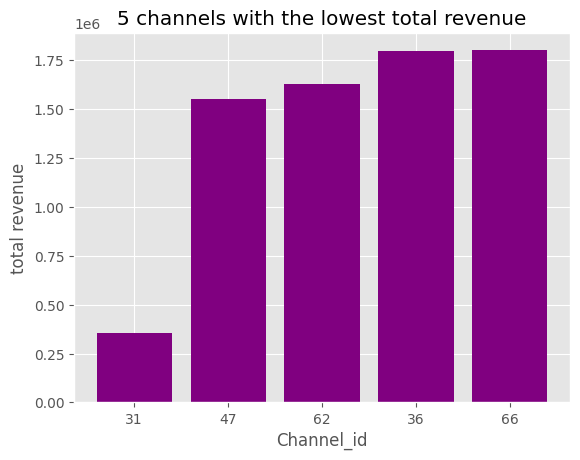

In [154]:
#Visualization

index2 = df.groupby('channel_id')['Revenue'].sum().sort_values(ascending=True).head(5).index.astype(object)
value2 =df.groupby('channel_id')['Revenue'].sum().sort_values(ascending=True).head(5).values
x = [1,2,3,4,5]

fig, ax = plt.subplots()

ax.bar(x,value2, align='center', color='purple')
ax.set_title('5 channels with the lowest total revenue')
ax.set_xlabel('Channel_id')
ax.set_ylabel('total revenue')

ax.set_xticks(x)
ax.set_xticklabels(index2)

plt.show()

#### 3. the top 2 most profitable industries

To search which the most profitable industy and category, we need to know the profit first

- Revenue is the total income
- Cost is the fee, so
- Profit = Revenue - Cost

In [133]:
df['profit'] = df['Revenue'] - df['Cost']
df.head(10)

,Date,channel_id,category_id,supplier_id,industry_id,pic_id,status,Revenue,Cost,commission,count,profit
0,2020-01-01,1,1,1,4,4,0,98845,99048,2970,3,-203
1,2020-01-01,1,2,1,4,4,1,879565,879563,26387,2,2
2,2020-01-01,1,3,2,4,4,1,322580,322227,0,1,353
3,2020-01-01,1,4,3,4,4,1,1945450,1830540,0,7592,114910
4,2020-01-01,1,4,3,4,4,0,310835,296239,3110,200,14596
5,2020-01-01,1,5,4,4,4,1,478455,243509,0,27,234946
6,2020-01-01,1,6,3,4,4,0,1971805,1951451,0,33,20354
7,2020-01-01,1,7,5,4,4,1,1435105,1385945,28702,17,49160
8,2020-01-01,1,7,5,4,4,0,365630,366020,3656,4,-390
9,2020-01-01,1,8,1,4,4,0,420370,417390,0,2,2980


In [134]:
# search for the biggest total profit for each industry id
df.groupby('industry_id')['profit'].sum().sort_values(ascending=False)

industry_id
3    3383936354
4    1004611995
2     477087248
1     104675596
5       1911573
6         19427
Name: profit, dtype: int64

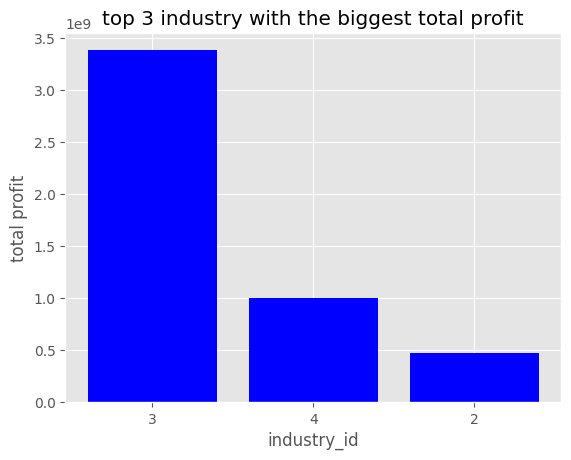

In [151]:
#visualization

index3 = df.groupby('industry_id')['profit'].sum().sort_values(ascending=False).head(3).index
value3 = df.groupby('industry_id')['profit'].sum().sort_values(ascending=False).head(3).values
x_industry = [1,2,3]

plt.bar(x_industry, value3, color='blue')
plt.title('top 3 industry with the biggest total profit')
plt.xlabel('industry_id')
plt.ylabel('total profit')
plt.xticks(x_industry,index3)

plt.show()

#### 4. the top 2 most profitable category

In [144]:
#search for the most profitable for each category
df.groupby('category_id')['profit'].sum().sort_values(ascending=False).head(5)

category_id
4     3492866353
8      599206486
1      245576604
10     113632714
6       97172653
Name: profit, dtype: int64

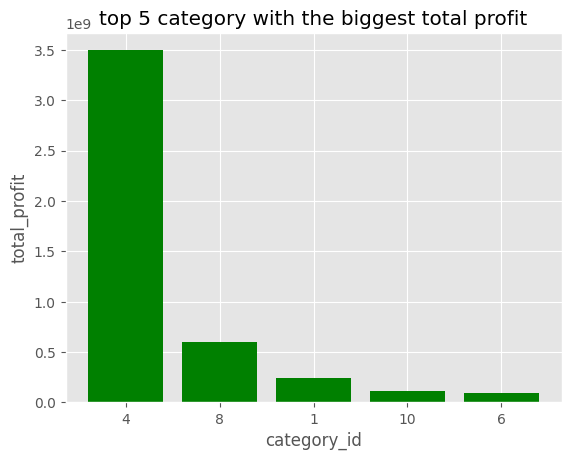

In [152]:
#visualization

index4 = df.groupby('category_id')['profit'].sum().sort_values(ascending=False).head(5).index
value4 = df.groupby('category_id')['profit'].sum().sort_values(ascending=False).head(5).values
x_category = [1,2,3,4,5]

plt.bar(x_category,value4, color='green')
plt.title('top 5 category with the biggest total profit')
plt.xlabel('category_id')
plt.ylabel('total_profit')
plt.xticks(x_category, index4)

plt.show()

#### 5. PIC that have best perfomance from the profit that have been produced

In [150]:
#search for the total profit for each pic_id
df.groupby('pic_id')['profit'].sum().sort_values(ascending=False).head(5)

pic_id
6    3321448581
4     782945512
1     380887372
8     196339732
2     173438318
Name: profit, dtype: int64

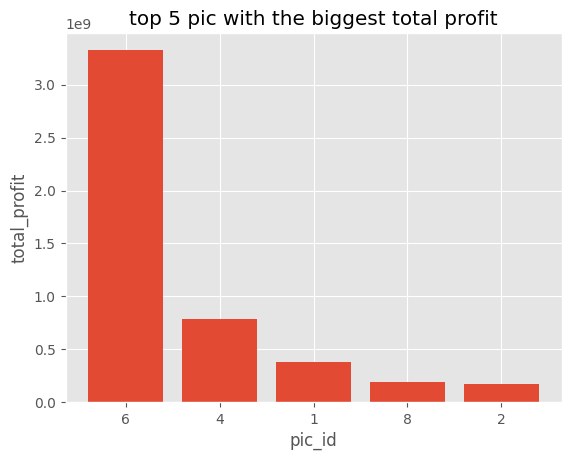

In [158]:
#visualization

index5 = df.groupby('pic_id')['profit'].sum().sort_values(ascending=False).head(5).index
value5 = df.groupby('pic_id')['profit'].sum().sort_values(ascending=False).head(5).values
x_pic = [1,2,3,4,5]

plt.bar(x_pic, value5)
plt.title('top 5 pic with the biggest total profit')
plt.xlabel('pic_id')
plt.ylabel('total_profit')
plt.xticks(x_pic,index5)

plt.show()

#### 6. Pic that have worst perfomance from the profit that have been produced

In [159]:
#search for the total profit for each pic_id
df.groupby('pic_id')['profit'].sum().sort_values(ascending=True).head(5)

pic_id
5      8959043
3     30366896
7     77856739
2    173438318
8    196339732
Name: profit, dtype: int64

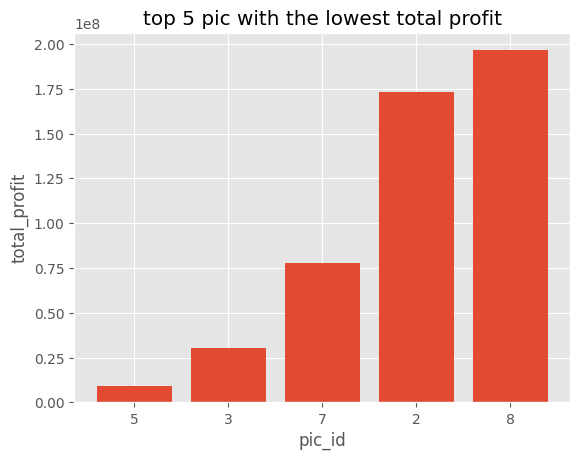

In [161]:
#visualization

index5 = df.groupby('pic_id')['profit'].sum().sort_values(ascending=True).head(5).index
value5 = df.groupby('pic_id')['profit'].sum().sort_values(ascending=True).head(5).values
x_pic = [1,2,3,4,5]

plt.bar(x_pic, value5)
plt.title('top 5 pic with the lowest total profit')
plt.xlabel('pic_id')
plt.ylabel('total_profit')
plt.xticks(x_pic,index5)

plt.show()

#### 7. Profit trend in 2020

In [202]:
#Make a new column with a month value in there
df['month'] = df['Date'].dt.month
df

,Date,channel_id,category_id,supplier_id,industry_id,pic_id,status,Revenue,Cost,commission,count,profit,month
0,2020-01-01,1,1,1,4,4,0,98845,99048,2970,3,-203,1
1,2020-01-01,1,2,1,4,4,1,879565,879563,26387,2,2,1
2,2020-01-01,1,3,2,4,4,1,322580,322227,0,1,353,1
3,2020-01-01,1,4,3,4,4,1,1945450,1830540,0,7592,114910,1
4,2020-01-01,1,4,3,4,4,0,310835,296239,3110,200,14596,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86028,2021-03-31,33,11,10,4,1,1,528405,349355,10570,82,179050,3
86029,2021-03-31,33,9,21,4,1,1,1844385,1844010,0,1,375,3
86030,2021-03-31,33,7,26,4,1,1,1816005,1817735,36320,4,-1730,3
86031,2021-03-31,33,4,30,4,1,1,1911990,1911951,0,7,39,3


In [197]:
# make a new dataframe which contain all data but only in 2020
index_year = df['Date'].dt.year == 2020
new_df = df[index_year]
new_df

,Date,channel_id,category_id,supplier_id,industry_id,pic_id,status,Revenue,Cost,commission,count,profit,month
0,2020-01-01,1,1,1,4,4,0,98845,99048,2970,3,-203,1
1,2020-01-01,1,2,1,4,4,1,879565,879563,26387,2,2,1
2,2020-01-01,1,3,2,4,4,1,322580,322227,0,1,353,1
3,2020-01-01,1,4,3,4,4,1,1945450,1830540,0,7592,114910,1
4,2020-01-01,1,4,3,4,4,0,310835,296239,3110,200,14596,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58774,2020-12-31,33,23,21,4,1,1,109585,108445,0,1,1140,12
58775,2020-12-31,33,7,26,4,1,1,792070,786970,7920,3,5100,12
58776,2020-12-31,33,4,3,4,1,0,1601120,1601200,0,4,-80,12
58777,2020-12-31,33,9,21,4,1,1,390100,391030,11703,1,-930,12


In [198]:
#now search the total profit for each month in 2020
new_df.groupby('month')['profit'].sum()

month
1     104471212
2      60319347
3     116074827
4     238085790
5     293010259
6     511507503
7     576452643
8     297464741
9     435993291
10    440260788
11    409994414
12    384171184
Name: profit, dtype: int64

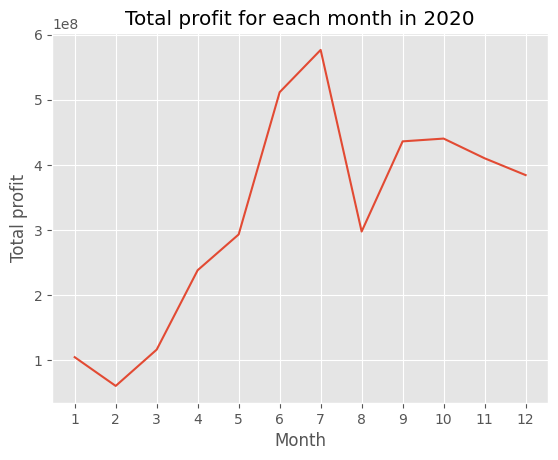

In [206]:
#visualization

index7 = new_df.groupby('month')['profit'].sum().index
value7 = new_df.groupby('month')['profit'].sum().values
x_month = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.plot(index7, value7)
plt.title('Total profit for each month in 2020')
plt.xlabel('Month')
plt.ylabel('Total profit')
plt.xticks(x_month,index7)

plt.show()

### 3. Summary

1. Two channels that have best sales performance is channel 1 (Fashionista) where the total revenue is 24.781.598.085 and channel 9 (Galleria) where the total revenue is 6.185.959.390


2. Two channels that have worst sales performance is channel 31 (Merch and dish) where the total revenue is 357.150 and channel 47 (Metro bank) where the total revenue is 1.552.320


3. The top 2 industries with the biggest profit are industry with id is 3 (Finance) where the total profit is 3.383.936.354 and industry with id is 4 (Retail) where the total profit is  1.004.611.995


4. The top 2 categories with the biggest profit are category with id is 4 (Prepaid Mobile) where the total profit is 3.492.866.353 and category with id is 8 (Mobile data) where the total profit is  599.206.486


5. Pic id who have the biggest profit is 6 (Ismail Salahudin) where the total profit is 3.321.448.581


6. Pic id who have the lowest profit is 5 (Dacin Nainggolan) where the total profit is 8.959.043


7. From January to February, the total profit has decreased. From February to July the total profit has increased and the biggest total profit happened in July where the total profit in July is 11 times more than total profit in February. And from the July to August the total profit has decreased. And from August to end of December the total profit has a tedency to increase although from October to December the total profit has decreased. So if we compare the total profit in January to December, we have a good profit because the total profit better then January.


8. I dont suggest to close this company because we have many profit in 2020 and the total profit in 2020 for each month always higher than total profit in January. Only total profit in February are smaller than total profit in January.